In [1]:
from environment import Environment
import matplotlib.pyplot as plt
import math
import numpy as np
from game import ShoeGame, SymmetricVotingGame, NonSymmetricVotingGame, AirportGame, SumUnanimityGames, UnanimityGame, GlobalFeatureImportance, LocalFeatureImportance
from plot import plot

In [2]:
from algorithms.halfbus import HalfBUS, SIRHalfBUS
from algorithms.ApproShapley import ApproShapley
from algorithms.BUS import BUS
from algorithms.HybridApproBUS import HybridApproBUS, SmartHybridApproBUS
from algorithms.SVARM import SVARM, StratSVARM, TruncStratSvarm, BasicStratSVARM
from algorithms.TMAB import TMAB
from algorithms.ISSV import ISSV

In [3]:
n=14
k=5
budget=1000
rounds=100
step_interval=100
metric = "ratio"
env = Environment(n=n, budget=budget, metric=metric)
results = []

In [4]:
game = LocalFeatureImportance(directory="datasets/adult classification", num_players=n, use_cached=True)

could not find cached values. manual reindexing...
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
could not find cached shapley values. manual calculation...
[0.00544952 0.00574562 0.03236789 ... 0.12079262 0.66241002 0.60913329]
[-1.52243011e-02  2.16164399e-01  6.93889390e-18  3.53443584e-02
  9.97287901e-03 -3.42386304e-02 -1.76341935e-03  8.96921884e-02
  3.63216781e-02  1.67367193e-01 -1.90089995e-02 -5.17034892e-03
  4.43639649e-02  7.98628084e-02] 0.6036837700812485


In [5]:
# results += [("SIRHalfBUS", env.evaluate(game, SIRHalfBUS(), k, step_interval, rounds))]

In [6]:
# results += [("StratSVARM", env.evaluate(game, StratSVARM(start_exact=False), k, step_interval, rounds))]

In [7]:
results += [("HalfBUS", env.evaluate(game, HalfBUS(focus=n), k, step_interval, rounds))]

In [8]:
results += [("ApproShapley", env.evaluate(game, ApproShapley(optimize=True), k, step_interval, rounds))]

In [9]:
# results += [("BasicStratSVARM", env.evaluate(game, BasicStratSVARM(), k, step_interval, rounds))]


In [10]:
plot(results, step_interval=step_interval, types=["topk", "mse"], metric=metric, save=True, filepath=f"results/{game.__class__.__name__}_n={n}_k={k}_T={budget}_r={rounds}_{metric}.pdf")

In [11]:
np.isin([[1,2,3],[3,4,5]], [2,3]).sum(axis=1)

array([2, 1])

In [12]:
pre_samples = 10

In [13]:
lengths = np.random.randint(n+1, size=(pre_samples))
lengths

array([ 5,  8,  1,  7,  2,  1,  5, 10,  7,  8])

In [14]:
np.mgrid[0:4, 0:4][1]

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

In [15]:
import pandas as pd

In [16]:
dataset = "datasets/adult classification/688.csv"

In [17]:
df = pd.read_csv(dataset)
df.tail()

,set,value
16379,s01245678910111213,0.560387
16380,s01345678910111213,0.609133
16381,s02345678910111213,0.120793
16382,s12345678910111213,0.662410
16383,s012345678910111213,0.609133


In [18]:
def index_to_coalition(index):
    view = np.array([index]).view(np.uint8)
    return np.where(np.unpackbits(view, bitorder='little'))[0]

def coalition_to_index(coalition):
    return np.sum(1 << coalition)

In [19]:
def binom(n, k):
    return math.factorial(n)/(math.factorial(k)*math.factorial(n-k))

In [20]:
num_sets_per_length = np.array([binom(n, l) for l in range(n+1)])
min_index_per_length = [np.sum(num_sets_per_length[:l]) for l in range(n+1)]
min_index_per_length

[0.0,
 1.0,
 15.0,
 106.0,
 470.0,
 1471.0,
 3473.0,
 6476.0,
 9908.0,
 12911.0,
 14913.0,
 15914.0,
 16278.0,
 16369.0,
 16383.0]

In [21]:

values = np.zeros((2**n))
for i in range(2**n):
    coalition = index_to_coalition(i)
    name = f"s{''.join(coalition.astype('str'))}"
    rows = df[df["set"] == name]
    if rows.shape[0] > 1:
        rows = rows[rows.index >= min_index_per_length[coalition.shape[0]]]
        rows = rows[rows.index < min_index_per_length[coalition.shape[0]+1]]
    if rows.shape[0] > 1:
        print(rows)

In [22]:
# for index, row in df.iterrows():
#     if df[df["set"] == row["set"]].shape[0] > 1:
#         print(df[df["set"] == row["set"]])

    set     value
13  s12  0.006902
28  s12  0.032368
    set     value
14  s13  0.010389
29  s13  0.058851
      set     value
26   s012  0.007277
106  s012  0.032694
      set     value
27   s013  0.010950
107  s013  0.059428
    set     value
13  s12  0.006902
28  s12  0.032368
    set     value
14  s13  0.010389
29  s13  0.058851
       set     value
105  s1213  0.013897
194  s1213  0.060228
      set     value
26   s012  0.007277
106  s012  0.032694
      set     value
27   s013  0.010950
107  s013  0.059428
        set     value
183  s01213  0.014646
480  s01213  0.060817
       set     value
105  s1213  0.013897
194  s1213  0.060228
        set     value
183  s01213  0.014646
480  s01213  0.060817


In [16]:
def pdf(x, mu, variance):
    return  np.exp((-(x-mu)**2)/(2*variance)) / np.sqrt(2*math.pi*variance)

<BarContainer object of 100 artists>

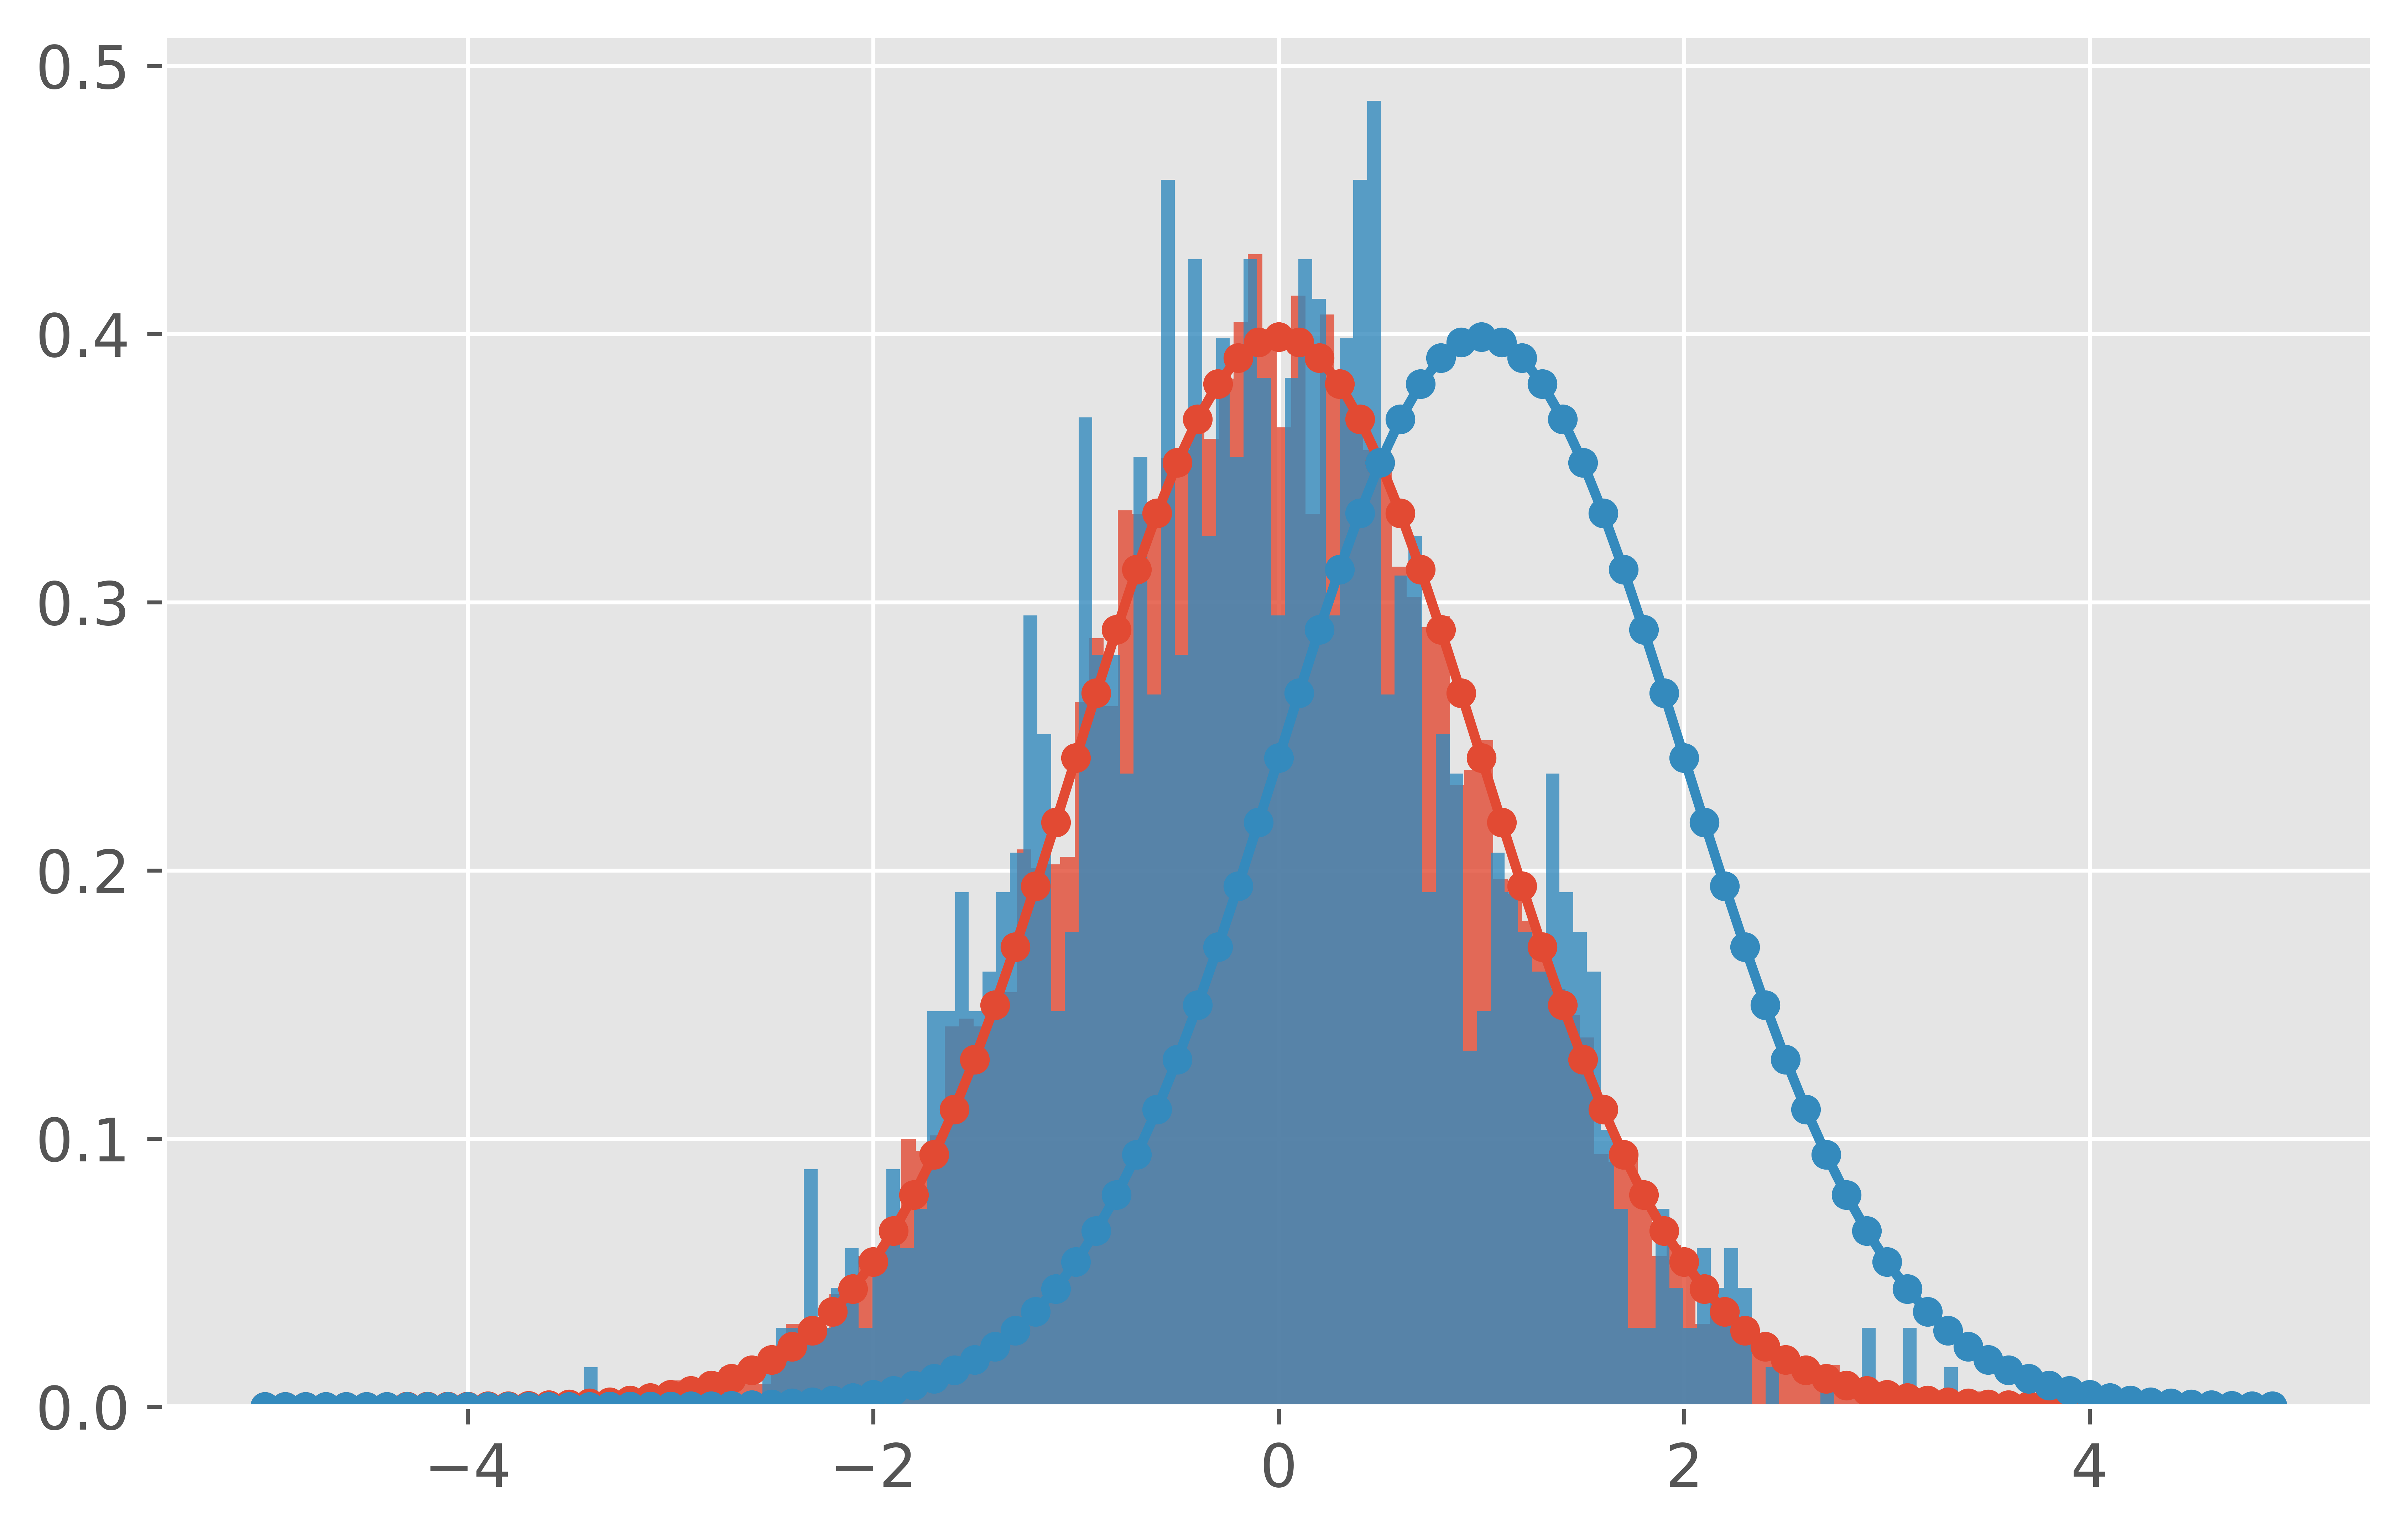

In [17]:
plt.style.use(plt.style.library['ggplot'])
plt.rcParams.update({'font.size': 12})
plt.rcParams['legend.frameon'] = False
plt.rcParams['lines.markersize'] = 10
fig, ax = plt.subplots(1, 1, figsize=(8,5), dpi=1000)
x = np.arange(100)/10 - 5
target_mu = 3
target_sigma = 1
values1 = pdf(x, 0, 1)
values2 = pdf(x, 1, 1)
samples = np.random.normal(0, 1, (10000))
weights = pdf(samples, 0, 1) / pdf(samples, 0, 1)
sum_weights = np.sum(weights)
new_samples = np.zeros((1000))
for j in range(1000):
    totalweight = 0
    # for i, sample in enumerate(samples):
    #     totalweight += weights[i]
    #     if np.random.rand() < weights[i]/totalweight:
    #         new_samples[j] = sample
    new_samples[j] = np.random.choice(samples, p=weights/sum_weights)

def histo(samples):
    num, edges = np.histogram(samples, bins=100)
    x = edges[:-1]
    width = edges[1:]-edges[:-1]
    area = np.sum(num * width)
    densities = num/area
    return x, densities, width 
ax.plot(x, values1, ".-", linewidth=2.0)
ax.plot(x, values2, ".-", linewidth=2.0)
preX, preDensity, preWidth  = histo(samples)
newX, newDensity, newWidth  = histo(new_samples)
ax.bar(preX, preDensity, preWidth, alpha=0.8)
ax.bar(newX, newDensity, newWidth, alpha=0.8)
# ax.plot(np.sort(samples), pdf(np.sort(samples), 1, 1), ".-", linewidth=2.0)